# 1. Введение

### О ЧЁМ БУДЕМ ГОВОРИТЬ?

Каждый раз, когда мы обсуждали хранящиеся в рабочих таблицах данные, мы обязательно указывали их принадлежность к тому или иному типу.

Прежде мы не акцентировали на этом внимание, но в действительности знание этих типов крайне важно для всего рабочего процесса. И этот модуль мы посвятим разговору о типах данных, а также об особенностях взаимодействия с некоторыми из них.

✍ В этом модуле вы:

- получите общие сведения об основных типах данных, которые применяются для хранения информации в базах данных;
- разберётесь в специфике строк и дат;
- узнаете, какие функции и операторы можно использовать для решения задач со строками и датами.

### С ЧЕМ БУДЕМ РАБОТАТЬ?

В этом модуле мы будем работать с уже знакомой вам схемой shipping, хранящей таблицы с данными о компании, которая организует перевозки грузов.

Интересующие нас данные всё так же хранятся в таблицах city, customer, driver и shipment (таблица truck в этом модуле нам не понадобится).

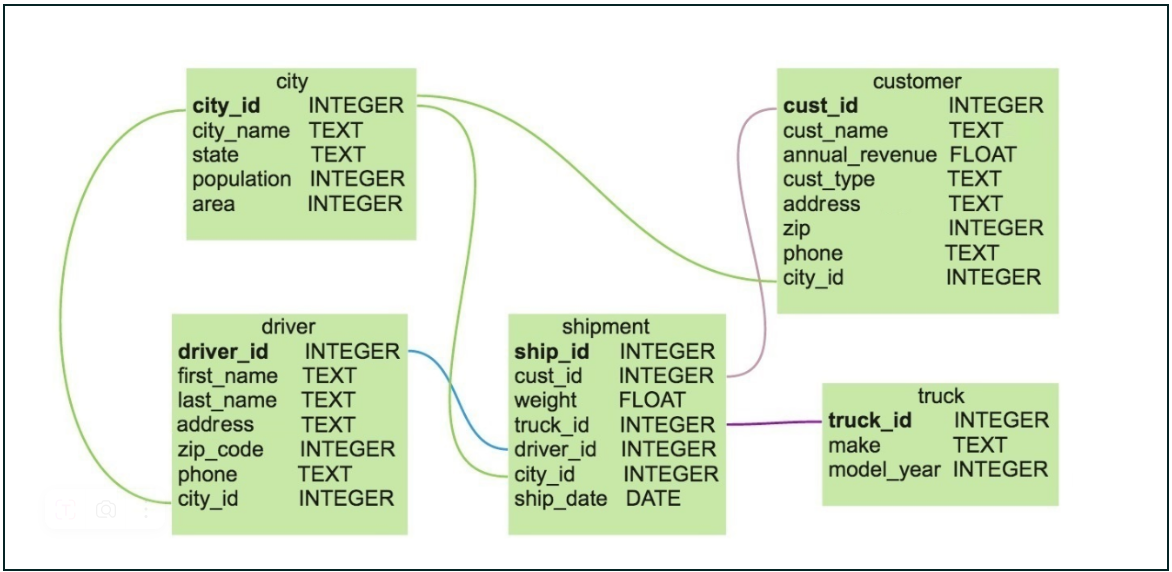

Поскольку вы уже работали с таблицами этой схемы, мы пропустим шаг «Знакомимся с данными» и перейдём непосредственно к освоению теории и выполнению практических заданий по ней.

При необходимости вы можете освежить воспоминания о структуре и содержимом датасета, вернувшись к этому юниту.

# 2. Типы данных в PostgreSQL

### ОБЗОР ТИПОВ ДАННЫХ

Особенностью хранения данных в БД является их строгая типизация, то есть точное и явное определение типов. Необходимость в типизации обусловлена тем, что компьютер по-разному обрабатывает даты, целые или дробные числа, строки.

Поэтому при создании таблицы БД обязательно указывают типы данных, которые будут сохраняться в каждом из её полей, — от этого зависит, какие значения допустимы в этих полях.

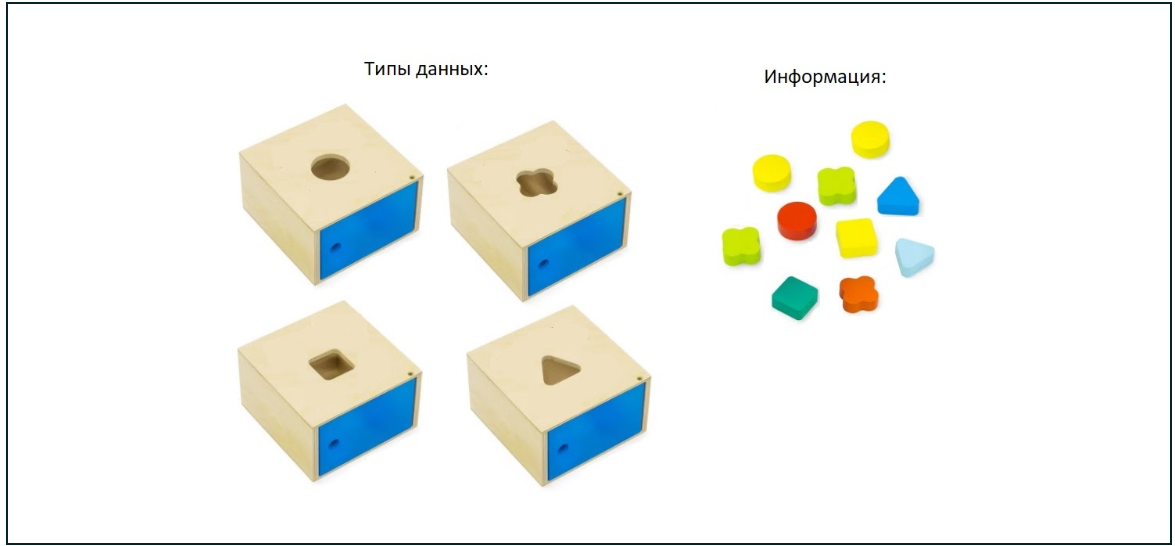

Если поле таблицы определено числовым типом данных, то произвольную строку 'Всем привет!' в него записать уже не получится. Таким образом, типы данных — это один из основных видов ограничений в PostgreSQL.

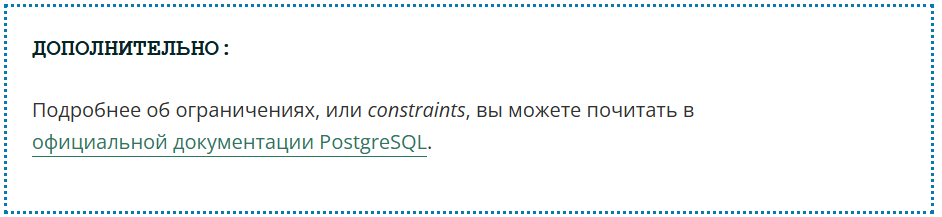

https://postgrespro.ru/docs/postgresql/9.5/ddl-constraints

### ОСНОВНЫЕ ТИПЫ ДАННЫХ В POSTGRESQL

SQL — это язык со строгой типизацией, в котором каждый элемент данных имеет некоторый тип, определяющий его поведение и допустимое использование.

Типы данных в PostgreSQL можно разделить на несколько групп. К основным относятся:

- числовые типы — для хранения чисел (целых и дробных);
- типы даты/времени — для хранения даты, времени, часовых поясов;
- символьные типы — для хранения символов или строк;
- логический тип — для хранения значений типа «истина», «ложь».

→ Каждая группа (кроме логического типа) объединяет несколько типов, отличающихся по допустимому диапазону хранимых данных. Например, числовые типы данных хранят целые числа, дробные числа, а строковые — подразделяются на типы с фиксированной и переменной длиной. А скажем, целочисленный тип данных integer может хранить значения в диапазоне от -2147483648 до 2147483647.

Конечно, чем больше допустимый диапазон, тем больше требуется места на жёстком диске для хранения каждого поля выбранного типа.

Кроме возможных значений из доступного диапазона, поле независимо от выбранного типа может принимать значение NULL (отсутствующее значение).

Напоминаем, что NULL отличается от нулевого значения или поля, содержащего пробел или пустую строку.

### И ЕЩЁ РАЗ О ВАЖНОСТИ ТИПИЗАЦИИ

В зависимости от требований к хранимой информации необходимо правильно применять типы данных. На это есть как минимум две причины.

Разные типы данных могут занимать разный объём памяти.

Например, если заранее известно, что поле таблицы будет принимать только небольшие числовые значения от 1 до 10, то можно не задавать для него тип bigint с максимально возможными хранимыми значениями, достаточно будет типа smallint (эти типы не будут предметом нашего обсуждения, но вы может посмотреть их описание в таблице).

На преобразование типов данных тратится время.

В некоторых случаях может потребоваться преобразование одного типа в другой — например, если нужно извлечь число из строки и произвести с ним какие-либо действия. Для подобных преобразований нужно использовать дополнительные функции. Иногда без этого не обойтись, но по возможности лучше хранить данные в полях соответствующего типа.

В этом модуле мы ограничимся разговором о таких типах данных, как даты и строки, а также поговорим о функциях, которые позволяют с ними работать.

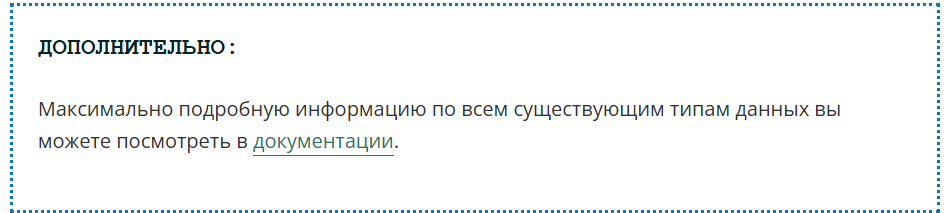

https://postgrespro.ru/docs/postgrespro/9.5/datatype

### 3. Даты: основные типы

→ Любой анализ событий во времени подразумевает работу с датой или временем.

Для них в Postgres существует несколько типов данных — все они представлены в таблице ниже.

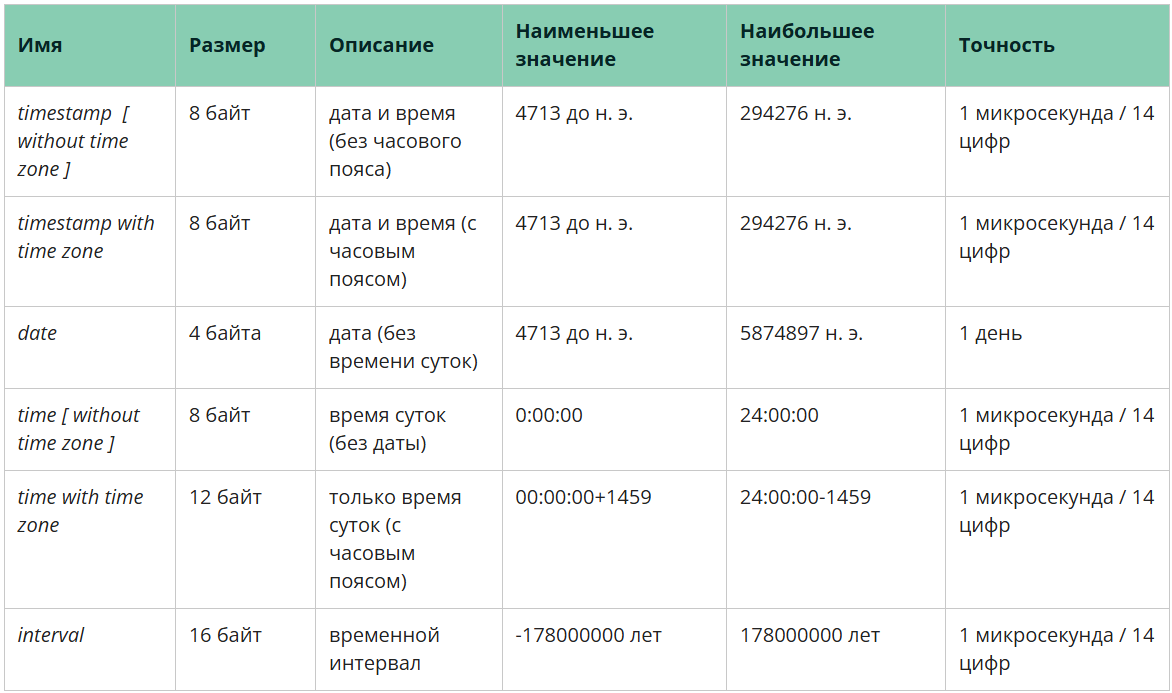

Давайте подробно разберём каждый из этих типов и выясним, в каких случаях и для чего они используются. 

### TIMESTAMP

Timestamp — наиболее распространённый тип данных, так как он содержит и дату, и время, а также используется в любых логах событий, временных рядах и в большинстве системных таблиц.



Согласно стандарту ISO, значение выглядит как "2019-07-14 01:35:44.702165+00", где перечислены через точку год-месяц-день, время и часовой пояс.

Для получения текущего значения даты и времени в Postgres используются функции CURRENT_TIMESTAMP (есть в стандарте SQL) и NOW() (есть в большинстве баз данных).

Выполните запросы SELECT NOW() и SELECT CURRENT_TIMESTAMP.

Глядя на вывод, вы заметите, что время отличается на целое число часов от реального времени у вас (если вы не в Лондоне или, скажем, на Канарских островах). В Москве разница составит 3 часа.

Давайте разберёмся.

### Timestamp with time zone

Timestamp with time zone позволяет хранить сведения о часовом поясе, что может быть удобно при анализе географически распределённых временных данных для единообразия хранения.

Предположим, в вашей компании в базу подтягивается время прихода сотрудников на работу. Вы пришли в 10 утра по Москве, а в Екатеринбурге в это время — полдень. Чтобы ваши коллеги из Екатеринбурга поняли, что вы пришли на работу вовремя, им нужно помнить про разницу в часовых поясах. А теперь представим, что пользователи БД разбросаны по всему миру и всем им необходимо помнить о разнице во времени и учитывать её при сверках с другими регионами.

Согласитесь, неудобно. Поэтому временные метки лучше всего хранить в базе в едином часовом поясе.

Посмотрим, как работает этот тип данных.

Сначала попробуем узнать, в каком часовом поясе выводятся временные данные в настоящий момент. Для этого выполните команду

In [ ]:
show timezone

В результате вы увидите GMT — это наиболее частая установка по умолчанию для баз данных. Что он обозначает, можно посмотреть здесь.

Список часовых поясов можно увидеть в системном справочнике pg_timezone_names.

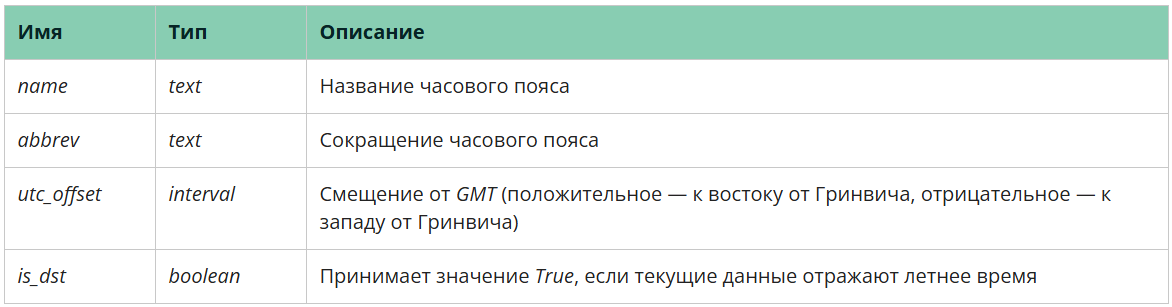

Описание этого справочника вы не сможете посмотреть в Metabase, но можете к нему обратиться, написав SQL-запрос.

Посмотрите содержимое этого справочника в Metabase.

А ещё посмотрите ваше время в каком-нибудь часовом поясе, например, в Москве. Для этого выполните в Metabase запрос

In [ ]:
select now() at time zone 'Europe/Moscow'

Указание at time zone позволяет переводить дату/время без часового пояса в дату/время с часовым поясом и обратно, а также пересчитывать значения времени для различных часовых поясов.

В таблице ниже приведены примеры того, как работает at time zone для разных типов данных.

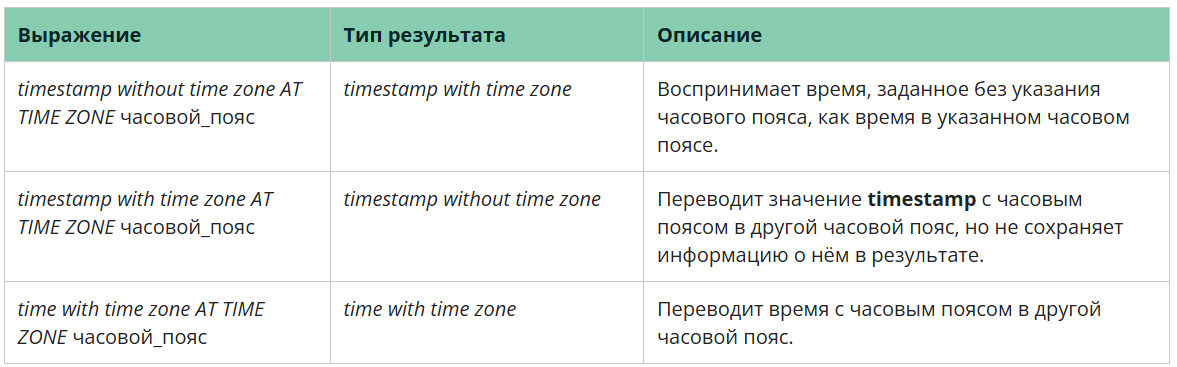

Давайте узнаем, сколько сейчас времени в другом регионе, например Лос-Анджелесе. Напишите запрос, который выведет текущие время и дату в часовом поясе Лос-Анджелеса ("America/Los_Angeles"). Столбец в выдаче — now (время и дата в нужном часовом поясе).

In [ ]:
select now() at time zone 'America/Los_Angeles' as now

### Date

С типом date вы уже знакомы, его реализация предельно проста. Отметим только, что тип timestamp (with/without time zone) можно легко перевести в соответствующую дату, используя синтаксис

In [ ]:
"timestamp_column"::date

И наоборот, тип date преобразуется в timestamp (дата и 00:00:00) с помощью

In [ ]:
"date_column"::timestamp

Для получения текущей даты можно использовать

In [ ]:
select CURRENT_DATE

или

In [ ]:
select now()::date

Предположим, у нас есть дата и время какого-то события и мы хотим посмотреть, к какой дате оно относится для Москвы и для UTC. Используйте следующий подзапрос и выведите дату в ts в Московском часовом поясе и в поясе UTC:

In [ ]:
with x as 
(
select '2018-12-31 21:00:00+00'::timestamp with time zone ts
)


Столбцы в выдаче: dt_msk (дата в московском часовом поясе), dt_utc (дата в UTC).

Примечание: в данном куске SQL-кода мы обозначаем результат запроса SQL как таблицу с именем x. В этой таблице содержится столбец ts. Воспользуйтесь этой таблицей для решения задачи. Например, чтобы посмотреть всё содержимое таблицы x, достаточно написать следующий запрос:

In [ ]:
with x as 
(
select '2018-12-31 21:00:00+00'::timestamp with time zone ts
)
select * from x


In [ ]:
with x as (
    select '2018-12-31 21:00:00+00'::timestamp with time zone ts
)
select 
    (ts at time zone 'Europe/Moscow')::date as dt_msk,
    (ts at time zone 'UTC')::date as dt_utc
from x

### Interval

Interval — тип данных, позволяющий хранить разницу между двумя временными метками. 

Интервалы хранят данные в трёх отдельных полях — месяцах, днях, секундах. Это сделано из-за того, что количество дней в месяце и часов в дне может быть разным. Пример значения такого типа: "195 days -10:52:23.563955".

Подробнее о том, как работают интервалы, мы узнаем позже, на примере конкретных функций, с помощью которых можно вычислять эти интервалы и работать с ними.

# 4. Функции и операторы для работы с датами

### Функции

Функция extract()



Функция extract() получает из значений даты/времени такие поля, как год или час.

Здесь источник — значение типа timestamp, time или interval. Допускается и тип date, поскольку он приводится к типу timestamp.

Указанное поле представляет собой идентификатор, по которому из источника выбирается заданное поле. Функция extract() возвращает значения типа double precision.

#### day

Для значений timestamp это день месяца (1-31), для значений interval — число дней.

In [ ]:
SELECT EXTRACT(DAY FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 16

In [ ]:
SELECT EXTRACT(DAY FROM INTERVAL '40 days 1 minute');

Результат: 40

#### hour

Час (0-23).

In [ ]:
SELECT EXTRACT(HOUR FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 20

#### month

Номер месяца, считая с января (1) до декабря (12).

In [ ]:
SELECT EXTRACT(MONTH FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 2

#### year

Поле года. Учтите, что года 0 не было, и это следует иметь в виду, вычитая из годов нашей эры годы до нашей эры.

In [ ]:
SELECT EXTRACT(YEAR FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 2001

#### isoyear

Год по недельному календарю ISO 8601, в который попадает дата (не применимо к интервалам).

In [ ]:
SELECT EXTRACT(ISOYEAR FROM DATE '2006-01-01');

Результат: 2005

In [ ]:
SELECT EXTRACT(ISOYEAR FROM DATE '2006-01-02');

Результат: 2006

Год по недельному календарю ISO начинается с понедельника недели, в которой оказывается 4 января, так что в начале января или в конце декабря год по ISO может отличаться от года по григорианскому календарю. Подробнее об этом рассказывается в описании поля week.

#### week

Номер недели в году по недельному календарю ISO 8601. По определению, недели ISO 8601 начинаются с понедельника, а первая неделя года включает 4 января этого года. Другими словами, первый четверг года всегда оказывается в первой неделе этого года.

В системе нумерации недель ISO первые числа января могут относиться к 52-й или 53-й неделе предыдущего года, а последние числа декабря — к первой неделе следующего года.

Например, 2005-01-01 относится к 53-й неделе 2004 г., а 2006-01-01 — к 52-й неделе 2005 г., тогда как 2012-12-31 включается в первую неделю 2013 г.

Поэтому для получения согласованных результатов рекомендуется использовать поле isoyear в паре с week.

In [ ]:
SELECT EXTRACT(WEEK FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 7

#### century

In [ ]:
SELECT EXTRACT(CENTURY FROM TIMESTAMP '2000-12-16 12:21:13');

Результат: 20

In [ ]:
SELECT EXTRACT(CENTURY FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 21

Первый век начался 0001-01-01 00:00:00, хотя люди в то время так и не считали. Это определение распространяется на все страны с григорианским календарём.

Века с номером 0 не было; считается, что 1 наступил после -1.

Если такое положение вещей вас не устраивает, направляйте жалобы по адресу: Ватикан, Собор Святого Петра, Папе Римскому, лично в руки :)

#### decade

Десятилетие.

In [ ]:
SELECT EXTRACT(DECADE FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 200

#### epoch

Для значений timestamp with time zone это число секунд с 1970-01-01 00:00:00 UTC (может быть отрицательным); для значений date и timestamp это число секунд с 1970-01-01 00:00:00 по местному времени, а для interval — общая длительность интервала в секундах.

In [ ]:
SELECT EXTRACT(EPOCH FROM TIMESTAMP WITH TIME ZONE
'2001-02-16 20:38:40.12-08');

Результат: 982384720.12

In [ ]:
SELECT EXTRACT(EPOCH FROM INTERVAL '5 days 3 hours');

Результат: 442800

Преобразовать время эпохи обратно, в значение дата/время, с помощью to_timestamp можно так:

In [ ]:
SELECT to_timestamp(982384720.12);

Результат: 2001-02-17 04:38:40.12+00

#### dow

День недели, считая с воскресенья (0) до субботы (6).

In [ ]:
SELECT EXTRACT(DOW FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 5

Заметьте, что в extract() дни недели нумеруются не так, как в функции to_char(..., 'D').

#### doy

День года (1-365/366).

In [ ]:
SELECT EXTRACT(DOY FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 47

#### isodow

День недели, считая с понедельника (1) до воскресенья (7).

In [ ]:
SELECT EXTRACT(ISODOW FROM TIMESTAMP '2001-02-18 20:38:40');

Результат: 7

Результат отличается от dow только для воскресенья. Такая нумерация соответствует ISO 8601.

Давайте посчитаем помесячную статистику по доставкам, используя функцию extract. Напишите запрос, который выведет год, месяц и количество доставок. Отсортируйте по году и по месяцу в порядке возрастания. Столбцы в выдаче: year_n (номер года), month_n (номер месяца), qty (количество доставок).

In [ ]:
SELECT 
  EXTRACT(YEAR FROM s.ship_date) year_n, 
  EXTRACT(MONTH FROM s.ship_date) month_n, 
  COUNT(*) qty 
FROM 
  shipping.shipment s 
GROUP BY 
  1, 2 
ORDER BY 
  1, 2


### Функция to_char()

Функция to_char() нужна для форматирования даты времени и интервалов в нужный текст.

Например, вы хотите вывести год, месяц и день со специфическим разделителем или получить текстовое наименование месяца или дня недели. По результату работы она очень близка к extract(), но больше нацелена именно на форматирование. Ниже вы видите таблицу с примерами вызовов:

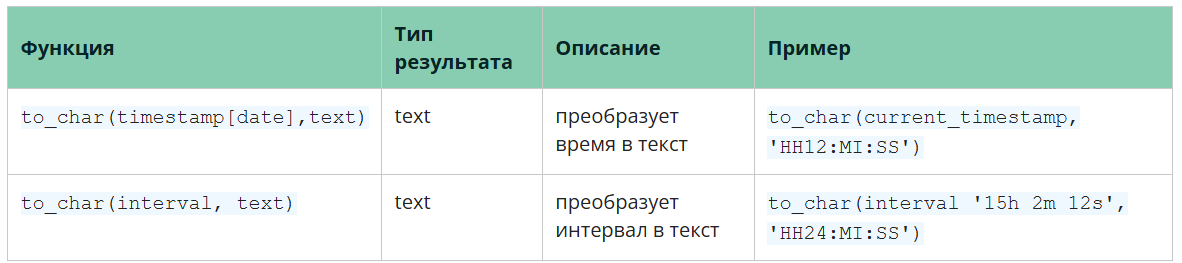

Первый параметр для функции — дата, время или интервал, а второй — текстовая маска получаемого результата. Перечень значений, которые можно использовать для маски, представлен в таблице ниже.

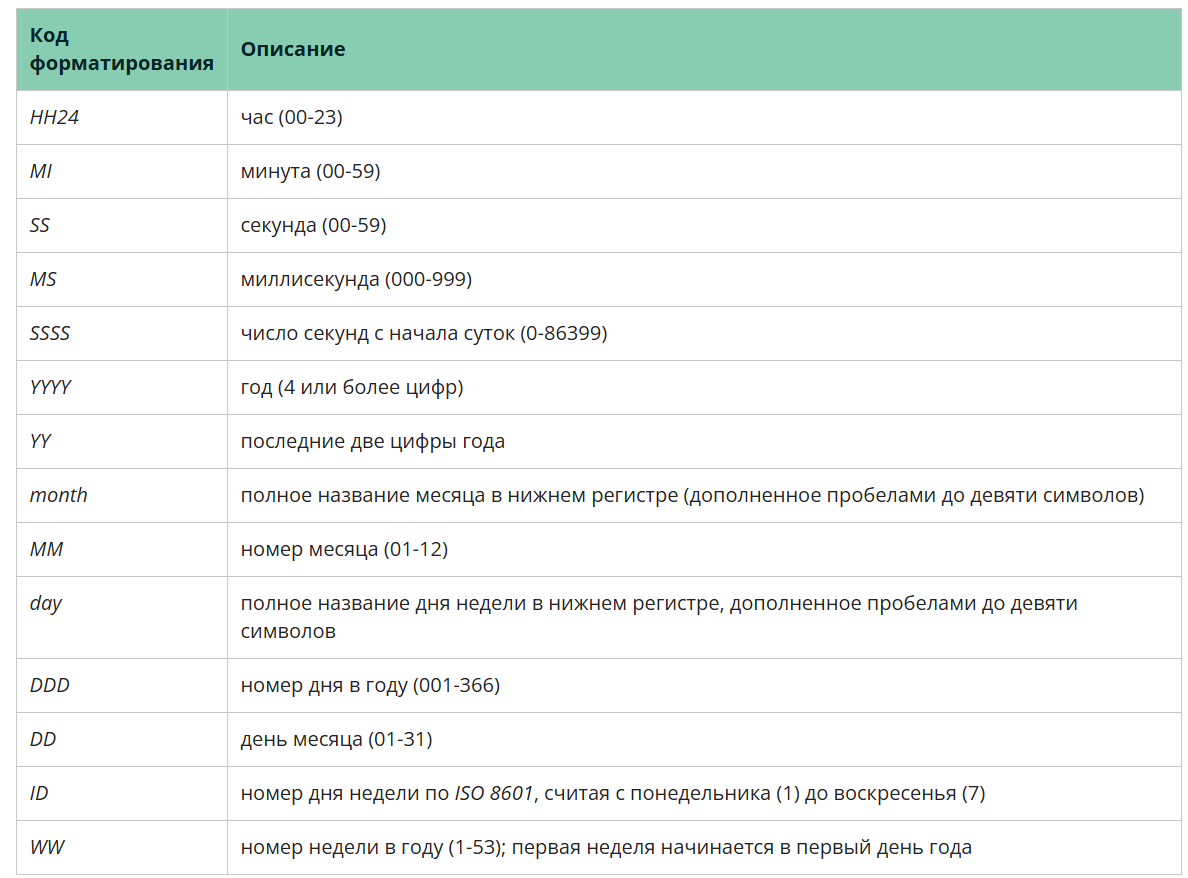

Полный перечень вы можете посмотреть в подсказке по кодам форматирования или таблице (чтобы увидеть её кликните Показать).

https://postgrespro.ru/docs/postgrespro/9.5/functions-formatting

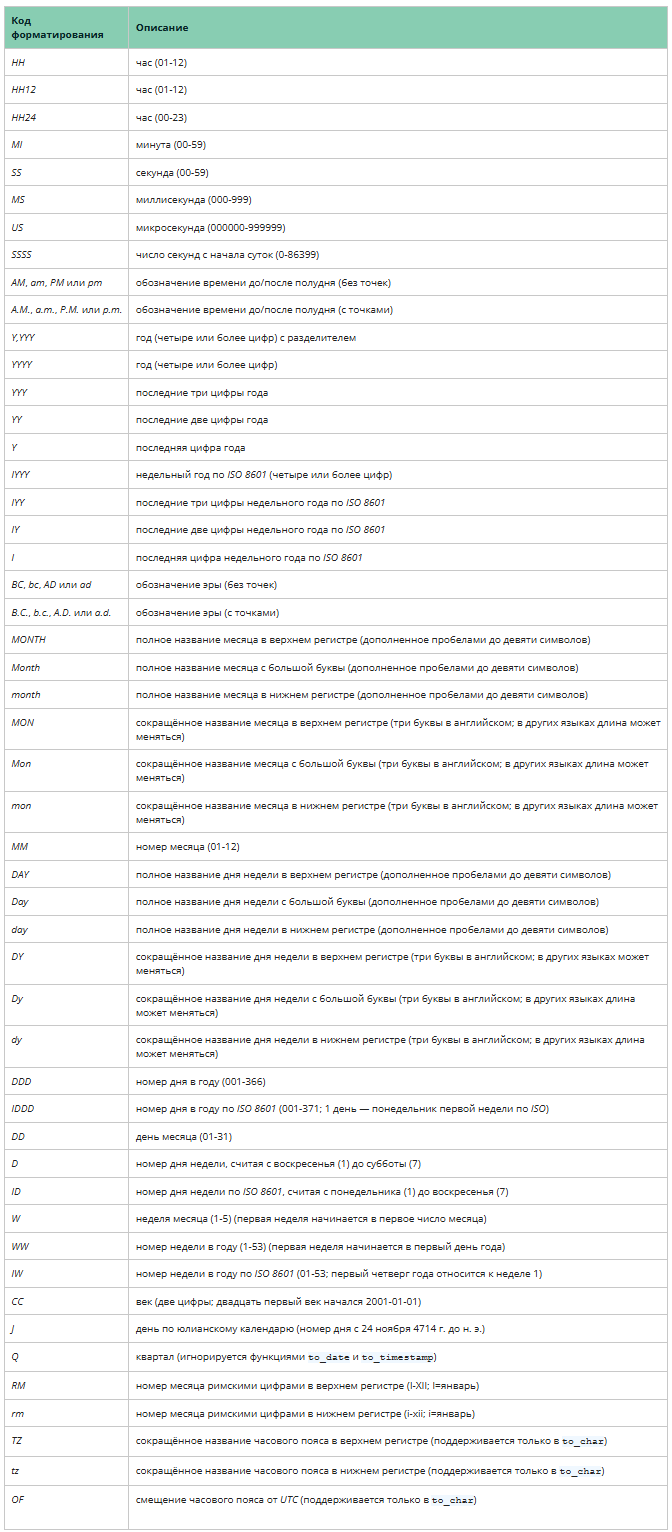

Любой текст, который относится к кодам форматирования, будет сохранён как есть. Чтобы оставлять какие-то подсказки и использовать обычные буквы, которые не встречаются в таблице выше, необходимо заключить текст, который нужно оставить без изменений, в двойные кавычки.

Предположим, мы хотим вывести сегодняшнюю дату в формате "Hello! Today is #название дня недели год.название месяца.день#" текстом. Для этого нужно выполнить следующий код: 

In [ ]:
select to_char(now(),'"Hello! Today is" DAY yyyy-Mon-dd')

Также поэкспериментируйте с разными видами форматирования и произвольными текстами.

Давайте выведем текст текущего времени для сервиса точного времени. Напишите запрос, который выводит текст "Точное время x часов y минут z секунд" (текст в кавычки заключать не нужно), где x, y, z — часы, минуты и секунды соответственно, при условии, что сообщение нужно вывести для московского часового пояса. Время введите в 24-часовом формате. Столбцы в выдаче: msg (сообщение).

In [ ]:
SELECT to_char(now() AT TIME ZONE 'Europe/Moscow', 'Точное время HH24 часов MI минут SS секунд') AS msg

### Функция date_trunc()

Функция date_trunc() позволяет отсечь заданное время, дату или дату со временем до нужной точности.

Формат вызова:

In [ ]:
 date_trunc('поле', значение)

Например, если мы хотим округлить текущее время-дату до минут, то можно вызвать

In [ ]:
 select date_trunc('minute',now())

Для получения разной степени точности вместо minute можно использовать следующие параметры:

- microseconds;
- milliseconds;
- second;
- minute;
- hour;
- day;
- week;
- month;
- quarter;
- year;
- decade;
- century;
- millennium.

Из их названий легко понять, какая временная единица подразумевается.

Давайте подготовим данные для квартальной отчётности компании. Напишите запрос, который выведет дату доставки, округлённую до квартала, и общую массу доставок. Отсортируйте по кварталу в порядке возрастания. Столбцы в выдаче: q (начало квартала, тип date), total_weight (сумма масс доставок за квартал).

In [ ]:
SELECT 
    date_trunc('quarter', s.ship_date)::date AS q,
    SUM(s.weight) AS total_weight
FROM 
    shipping.shipment s
GROUP BY 
    q
ORDER BY 
    q

### Математические операторы

К любой дате можно прибавить (и вычесть из неё) целое число X и получить другую дату, которая больше (меньше) изначальной.

Пример:

In [ ]:
select '2019-01-01'::date + 10

Результат: '2019-01-11'

Это — дата на 10 дней позже 2019-01-01.

При добавлении (или вычитании) целого числа к дате Postgres учитывает переходы между месяцами и годами и даёт верный ответ, соответствующий календарю. Учитываются даже високосные годы.

Пример:

In [ ]:
select '2019-01-01'::date + 500

Результат: '2020-05-15'

Как видим, сменились и год, и месяц, и день.

Аналогично можно вычесть из одной даты другую и получить расстояние в днях между этими датами. При такой операции тоже будет честная разница по календарю.

Пример:

In [ ]:
select '2019-02-10'::date - '2017-03-01'::date

Результат: 711

Давайте оценим, в каком интервале совершались доставки в разных городах. Напишите запрос, который выведет разницу между последним и первым днём доставки по каждому городу. Отсортируйте по первому и второму столбцам. Столбцы в выдаче: city_name (название города) и days_active (время от первой до последней доставки в днях).

In [ ]:
SELECT 
    s.city_name,
    MAX(s.ship_date)::date - MIN(s.ship_date)::date AS days_active
FROM 
    shipping.shipment s
GROUP BY 
    s.city_name
ORDER BY 
    s.city_name, days_active

In [ ]:
SELECT 
    c.city_name,
    max(s.ship_date) - min(s.ship_date) as days_active
FROM shipping.shipment s 
JOIN shipping.city c ON c.city_id = s.city_id
GROUP BY 1
ORDER BY 1


# 5. Строковые данные: основные типы

В Postgres есть три основных типа данных для работы со строками: character, character varying и text.

Кратко представим каждый из них.

### character

Cтрока фиксированной длины, дополненная пробелами.

Длина строки такого типа всегда одинакова и задаётся в скобках.

Например, в столбце character(5) всегда будет пять символов: строку большей длины туда вставить не получится, а строка меньшей длины будет дополняться ведущими пробелами. Слово "SQL" в таком столбце будет выглядеть как "  SQL".

Основной паттерн использования такого типа — универсальные справочники буквенных кодов, например код страны в стандарте ISO (RU, US, UK и т. д.).

### character varying

Строка ограниченной переменной длины.

Например, в столбце типа character varying(5) нельзя будет хранить строку большей длины, но могут быть любые строки с меньшей длиной.

Этот тип данных повсеместно используется для хранения данных, поскольку позволяет ограничить ввод, сохраняя при этом возможность иметь строки произвольной длины.

### text

Cтрока неограниченной длины.

Самый удобный тип для пользователя, но самый тяжеловесный для администратора баз данных, так как в строку можно записать любой текст.

Для удобства все текстовые поля в нашем датасете с доставками представлены типом text.

# 6. Функции и операторы для работы со строками

### Операторы

Соединение строк

Для начала познакомимся с оператором конкатенации строк — || (две вертикальные черты). Он позволяет объединять две и более строки.

Конструкции с оператором соединения строк записываются следующим образом:

In [ ]:
строка1 || строка2 || ... || строкаN

Важно! Результатом соединения любых типов строковых данных будет тип text.

Напишем запрос, который позволит подготовить простые select-запросы для всех таблиц из схемы.

In [ ]:
select 'select * from '||t.table_schema||'.'||t.table_name||';' query
from information_schema.tables t
where table_schema = 'shipping'

В результате должно получиться пять SQL-запросов, по одному к каждой таблице из схемы shipping. 

Как мы видим, соединять можно и рукописный текст, и значения столбцов в любом произвольном порядке.

В результате должно получиться пять SQL-запросов, по одному к каждой таблице из схемы shipping. 

Как мы видим, соединять можно и рукописный текст, и значения столбцов в любом произвольном порядке.

Важно! Если вы соединяете любую строку и NULL, то результатом будет NULL. Поэтому, если вы формируете какой-то текст на основе поля, в котором присутствует NULL, используйте оператор coalesce.

https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull

Составим текстовый шаблон сообщения о доставке по конкретному водителю для наших клиентов. Напишите SQL-запрос, который выведет следующее сообщение для каждого водителя по форме:

Ваш заказ доставит водитель #Имя Фамилия#. Его контактный номер: #Номер#
Где #Имя Фамилия# и #Номер# взяты из справочника водителей. Если номер не указан, то выведите прочерк (-). Для номеров рекомендуем использовать COALESCE. Пример из таблицы для наглядности:

Ваш заказ доставит водитель Adel Al-Alawi. Его контактный номер: (901) 947-4433
Столбец к выдаче — msg (текст сообщения).

In [ ]:
SELECT 
    'Ваш заказ доставит водитель ' || d.first_name || ' ' || d.last_name || 
    '. Его контактный номер: ' || COALESCE(d.phone, '-') AS msg
FROM 
    shipping.driver d

# Функции

### UPPER() и LOWER()

Функции upper(your_text) и lower(your_text) переводят каждый символ вашего текста в верхний и нижний регистр соответственно.

Пример:

In [ ]:
select upper('Abc') s1 ,lower('xYz') s2

Чаще всего эти функции используются для унификации и стандартизации, особенно они актуальны для данных, введённых вручную.

Например, названия города в анкете можно написать разными способами, но символьный состав останется одним и тем же (Москва, москва, МОСКВА).

Результат функций upper() и lower() — тоже строковый, а значит, к нему можно применять все функции, применимые к этому типу данных.

Cоставим справочник названий клиентов, у которых более десяти доставок. Данные сохраним в нижнем регистре, чтобы передавать их в другие системы (например, для обзвона), которые не чувствительны к регистру. Напишите запрос, который выводит все id названий клиентов, у которых более десяти доставок, в нижнем регистре. Отсортируйте результат по cust_id в порядке возрастания. Столбцы в выдаче: cust_id (id клиента) и cust_name (название клиента в нижнем регистре).

In [ ]:
SELECT 
    c.cust_id, 
    LOWER(c.cust_name) AS cust_name
FROM 
    shipping.customer c
JOIN 
    shipping.shipment s ON c.cust_id = s.cust_id
GROUP BY 
    c.cust_id, c.cust_name
HAVING 
    COUNT(*) > 10
ORDER BY 
    c.cust_id

### Replace()

С помощью функции replace() можно заменять символы в строках.

Запись строится следующим образом:

In [ ]:
replace(string text, from text, to text)

Эта запись означает, что в исходной строке string мы заменяем все вхождения строки from на строку to.

Разберём на примере.

Эта запись означает, что в исходной строке string мы заменяем все вхождения строки from на строку to.

Разберём на примере.

In [ ]:
select replace('малако','а','о')

Результат выполнения такого запроса будет молоко, т. е. все буквы «а» в строке «малако» были заменены на «о».

С таким же успехом можно заменять строку, состоящую из нескольких символов.

Сделаем из слова «машина» слово «матрас».

In [ ]:
select replace('машина','шина','трас')

В строке 'машина' мы заменили строку 'шина' на строку 'трас'.

Результат функции replace() — строка, а значит, к ней тоже можно применять все известные нам функции работы со строками.

Если вы хотите удалить из строки какие-то символы, то третьим параметром (to) передайте пустую строку ''(одинарные кавычки без символа внутри).

Например, сделаем из строки "Hello, world!" строку "Hello!".

In [ ]:
select replace('Hello, world!',', world','')

Составим справочник utm-меток, для того чтобы передавать город и штат прямо в адресной строке. (Если вы не знаете, что такое utm-метка, почитайте статью на Вики. К программе курса это не относится, но знать полезно.) Напишите SQL-запрос, который выведет список сочетаний из справочника следующего вида: название_штата__название_города, где названия штата и города взяты из справочника городов и переведены в нижний регистр. Столбец к выдаче — utm (форматированный штат-город). Отсортируйте полученный справочник по алфавиту. Обратите внимание! Все пробелы в названиях городов и штатов замените символом '_' (одно нижнее подчёркивание), а для разделения названий города и штата используйте '__' (два последовательных нижних подчёркивания). Пример из таблицы для наглядности: new_jersey__union_city

In [ ]:
SELECT 
    replace(lower(c.state), ' ', '_') || '__' || replace(lower(c.city_name), ' ', '_') AS utm
FROM 
    shipping.city c
ORDER BY 
    utm

### Left() и Right()

Теперь познакомимся с функциями, обрезающими строки.

Функции left(string,n) и right(string,n) оставляют n левых или правых символов от строки, поданной на вход. Давайте разобьём строку 'Один два три' на слова, используя эти функции.

In [ ]:
with t as
(
select 'Один два три'::text sample_string
)
select 
 left(t.sample_string,4) one,
 right(left(t.sample_string,8),3) two,
 right(t.sample_string,3) three
from t

In [ ]:
with t as
(
select 'Один два три'::text sample_string
)
select 
 left(t.sample_string,4) one, /*берём 4 левых символа строки*/
 right(left(t.sample_string,8),3) two, /*берём 8 левых символов строки, потом 3 правых от результата*/
 right(t.sample_string,3) three /*берём 3 правых символа от строки*/
from t

Пример:

In [ ]:
select left('0123456789', - 2), right('0123456789', - 2)

Результат: 01234567 и 23456789 (в первом случае — восемь символов с «отрезанными» 89 и во втором случае — восемь символов с «отрезанными» 01)

Представим, что к вам пришёл разработчик, который хочет сократить поле state в таблице city до четырёх символов, и попросил проверить, останeтся ли значения в нём уникальными. Чтобы ответить на этот вопрос, напишите SQL-запрос, который выведет первые четыре символа названия штата и количество уникальных названий штатов, которому они соответствуют. Оставьте только те, которые относятся к двум и более штатам. Добавьте сортировку по первому столбцу. Столбцы в выдаче: code (четыре первых символа в названии штата), qty (количество уникальных названий штата, начинающихся с этих символов).

In [ ]:
SELECT 
    LEFT(c.state, 4) AS code,
    COUNT(DISTINCT c.state) AS qty
FROM 
    shipping.city c
GROUP BY 
    code
HAVING 
    COUNT(DISTINCT c.state) >= 2
ORDER BY 
    code

### Format()

Функция format() используется для составления форматированного текста с подстановками. То же самое можно сделать через конкатенацию строк, но это неудобно и громоздко.



Допустим, у нас есть шаблон "Hello, #Имя пользователя#!" и таблица водителей, которым нужно вывести приветствие.

Через конкатенацию это можно сделать следующим образом:

In [ ]:
select 'Hello, ' || d.first_name || '!' hello from shipping.driver d

Но если нужно подставить и имя, и фамилию, то соединений становится слишком много и сам шаблон становится трудночитаемым. Вот тут и приходит на помощь функция format().

Синтаксис функции выглядит следующим образом:

In [ ]:
format(formatstr text [, argument1 text,argument2 text...])

где formatstr — это шаблон, который мы передаём. Это обычная строка, в которой указаны места для подстановки аргумента.

Вернёмся к задаче с приветствием водителя.

Теперь мы можем решить её с помощью format():

In [ ]:
select format('Hello, %s!', d.first_name) from shipping.driver d

Комбинация символов %s обозначает, что вместо них будет подставлен один из аргументов, причём в том же порядке, что и в исходном столбце.

Напишем запрос, который описывает содержимое каждой строки в таблице в виде текста.

In [ ]:
select format('driver_id = %s, first_name = %s, last_name = %s, address = %s, zip_code = %s, phone = %s, city_id = %s', driver_id, first_name, last_name, address, zip_code, phone, city_id) from shipping.driver d

Мы перечислили в строке семь пропусков (плэйсхолдеров, или мест для подстановки, — %s), передали семь параметров (все столбцы таблицы) и получили шаблон, заполненный значениями для каждой строки.

Если в вашем шаблоне присутствует одинарная кавычка, то для удобства можно вместо одинарных кавычек использовать $$ (два знака доллара):

In [ ]:
select $$ some_string with quotes ' $$

Давайте подготовим географическую сводку для каждого города. Напишите SQL-запрос, который выведет описание региона в следующем формате:

In [ ]:
[city_name] is located in [state]. There's [population] people living there. Its area is [area]

Обратите внимание, точку в конце ставить не нужно. Отсортируйте по названию города в алфавитном порядке. Столбец к выдаче — str (сводка). Пример:

In [ ]:
Abilene is located in Texas. There's 115930 people living there. Its area is 105.10


In [ ]:
SELECT 
    format('%s is located in %s. There''s %s people living there. Its area is %s', 
        c.city_name, c.state, c.population, c.area) AS str
FROM 
    shipping.city c
ORDER BY 
    c.city_name

# 7. Итоги

✍ Кажется, мы уже неплохо разбираемся в существующих типах данных и знаем, как найти подход к каждому из них.

В этом модуле мы:

познакомились с основными типами данных в PostgreSQL;
более детально рассмотрели такие типы данных, как даты и строки;
узнали, в работе с какими данными какие операторы и функции применяются;
попробовали с их помощью решить несколько типовых задач.
Отличная работа!